# Project team & objective



**Project: Pneumonia detection in Chest X-rays using Computer Vision**

**Team members**
1.   Anurag Maithray 
2.   Gokuul V
3.   Jishnu Venugopal  
4.   Surabee Sharma
5.   Tarun Babu

***Objective***

Project- To develop a machine learning model to identify, locate and classify Chest X-rays with Pneumonia

The major objective of this notebook is to demonstrate the final model for the project, post various attempts. The notebook is divided into 5 sections. These include,

1. Section 1    -   Setting up the work environment (Import libraries & dataset)
2. Section 2    -   Incremental EDA and data preparation
3. Section 3    -   Building the requisite model
4. Section 4    -   Model fitting
5. Section 5    -   Model evaluation and result

# Section 1- Setting up the work environment (Import libraries & dataset)



All necessary libraries for proceessing, model building and evaluation are installed and imported in this section.

In [ ]:
!apt-get install openslide-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 33 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (179 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2

Openslide library is used to read higher resolutions images in medicine especially in digital pathology. This particular library is utilized for handling radiology images.

In [ ]:
!pip install d2l

In [ ]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 82kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
pip install pydicom

     |████████████████████████████████| 35.5MB 26.6MB/s 


For handling DICOM based radiology images

In [ ]:
!apt-get install python3-openslide

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  javascript-common libjs-jquery python-asn1crypto python-blinker
  python-cffi-backend python-click python-colorama python-cryptography
  python-enum34 python-flask python-idna python-ipaddress python-itsdangerous
  python-jinja2 python-markupsafe python-openslide-examples python-openssl
  python-pkg-resources python-pyinotify python-simplejson python-six
  python-werkzeug python3-olefile python3-pil
Suggested packages:
  apache2 | lighttpd | httpd python-blinker-doc python-cryptography-doc
  python-cryptography-vectors python-enum34-doc python-flask-doc
  python-jinja2-doc python-openssl-doc python-openssl-dbg python-setuptools
  python-pyinotify-doc ipython python-genshi python-lxml python-greenlet
  pyt

In [ ]:
!pip install openslide-python

In [ ]:
#Importing necessary libraries
import pylab
import csv
import random
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras
import skimage.exposure


import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
import seaborn as sns
import pydicom 
%matplotlib inline 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import multiprocessing
from skimage import morphology
from skimage import feature
from skimage import measure
from skimage import util
from skimage import transform
from google.colab import drive
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
warnings.filterwarnings('ignore')


The project holding drive section is mounted for dataset access

In [ ]:
#Mounting the drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


The working directory is invoked and the dataset present in the director is loaded. The dataset is the stage 2 dataset relesased by the RSNA (Radiological Society of North America). There are 3 major training set related files.

a) Training images with metadata

b) Labels of the training images

c) Class information

In [ ]:
#Set the project path 
project_path = '/content/drive/My Drive/AIML/Datasets/'
os.chdir(project_path)

In [ ]:
#Loading the images
images_path = ("/content/drive/My Drive/AIML/Datasets/stage_2_train_images")


In [ ]:
class_info_df = pd.read_csv(project_path+'stage_2_detailed_class_info.csv')
train_labels_df = pd.read_csv(project_path+'stage_2_train_labels.csv')

In [ ]:
folder = "/content/drive/My Drive/AIML/Datasets/stage_2_train_images"
#folder = "/content/drive/My Drive/AIML/Datasets/filtered_train_images"
filenames = os.listdir(folder)
#random.shuffle(filenames)

# Section 2 - Incremental EDA and data preparation

Several attempts were made to use the entire dataset to train the model. The results of the same were specified in the report. The issue noticed was that the recall and precision for the prediction of Pneumonia was less than 0.5 making model of not great use since its efficiency is less than a radiologist.

The major reason for the same was the imbalance in the dataset. 

a) Pneumonia images   -   6012 (Nos.)

b) Non-Pneumonia images   -  20672 (Nos.)

An attempt to imporve the precision and recall was made with balancing the dataset by dropping half of the images without Pneumonia, which is demonstrated in this section

In [ ]:
# empty dictionary
pneumonia_locations = {}
i=0
# load table
with open(os.path.join("/content/drive/My Drive/AIML/Datasets/stage_2_train_labels.csv"), mode='r') as infile:
    reader = csv.reader(infile)
    # skip header
    next(reader, None)

    for rows in reader:
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
           # convert string to float to int
           location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
           if filename in pneumonia_locations:
              pneumonia_locations[filename].append(location)
           else:
              pneumonia_locations[filename] = [location]
        else:              
          if (filename+'.dcm') in (filenames):
            if i % 2 == 0:
              filenames.remove(filename+'.dcm')
            i=i+1



In [ ]:
print(len(pneumonia_locations))
print(len(filenames))

6012
16348


In [ ]:
# Resolution of the images

IMAGE_HEIGHT = 1024
IMAGE_WIDTH = 1024

In [ ]:
# split into train and validation filenames
n_valid_samples = 2560
n_test_samples = 500
train_filenames = filenames[n_valid_samples+n_test_samples:]
valid_filenames = filenames[n_test_samples:n_valid_samples]
test_filenames = filenames[:n_test_samples]
#test_filenames = filenames[:10]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
print('n test samples', len(test_filenames))
n_train_samples = len(filenames) - n_valid_samples - n_test_samples
print(n_train_samples)

n train samples 13288
n valid samples 2060
n test samples 500
13288


In [ ]:

print('Total train images:',len(filenames))
print('Images with pneumonia:', len(pneumonia_locations))

Total train images: 16348
Images with pneumonia: 6012


50% of the non-pneumonia images are dropped.
> Total non-pnemonia images- 20,672

> Dropped non-pneumonia images- 10,336

> Number of pneumonia images- 6,012

> Total training set size- 16,348

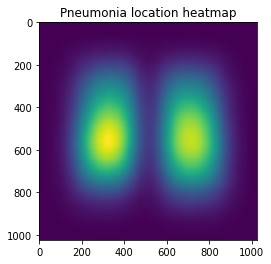

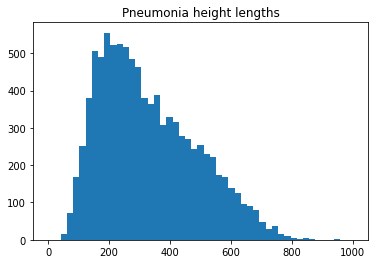

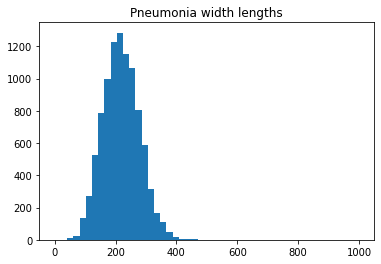

Minimum pneumonia height: 45
Minimum pneumonia width:  40


In [ ]:
ns = [len(value) for value in pneumonia_locations.values()]
# plt.figure()
# plt.hist(ns)
# plt.xlabel('Pneumonia per image')
# plt.xticks(range(1, np.max(ns)+1))
# plt.show()
heatmap = np.zeros((1024, 1024))
ws = []
hs = []
for values in pneumonia_locations.values():
    for value in values:
        x, y, w, h = value
        heatmap[y:y+h, x:x+w] += 1
        ws.append(w)
        hs.append(h)
plt.figure()
plt.title('Pneumonia location heatmap')
plt.imshow(heatmap)
plt.figure()
plt.title('Pneumonia height lengths')
plt.hist(hs, bins=np.linspace(0,1000,50))
plt.show()
plt.figure()
plt.title('Pneumonia width lengths')
plt.hist(ws, bins=np.linspace(0,1000,50))
plt.show()
print('Minimum pneumonia height:', np.min(hs))
print('Minimum pneumonia width: ', np.min(ws))

Visualization of the bounding box sizes. The distribution as per the earlier EDA.

**Data preparation**

To prepare the data for training with any algorithm it is essential to complete the following,
*   Extract all requsite images
*   Map the labels to the images 
*   Create masks using the bounding boxes and assign to the data file

In addition, data augmentation is also pursued by using the following,


*   Horizontal flipping of the data is completed for 50% of the images and masks
*   Resizing from 1024 X 1024 to 256 X 256 to suit the input layer of the CNN is pursued.
*   The images are also shuffled and clubbed into batches of size 32.

In [ ]:
class generator(keras.utils.Sequence):

    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=256, shuffle=True,
                 augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        msk = np.zeros(img.shape)
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y + h, x:x + w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        filenames = self.filenames[index * self.batch_size:(index + 1) * self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks

    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)

    # ??????
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)
    # ??????

# Section 3- Building the requisite model

Pneumonia is detected using opacity with no major size or shape. This means that there is a need to augment and expand the opacity field. This call for a U-net architecture with CNN.

Step 1- The resized 256 X 256 image is downsampled successively

In [ ]:
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x


After the model was run as a pure NN, it was observed that the gradient was difffused in 3 epochs making it unviable for further training. Therefore a Resnet 52 block with the following code was added.

In [ ]:

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

CNN was then attached to ensure that the final output of the neural network was viable for classification. The final architecture is as follows:

![alt text] (https://drive.google.com/file/d/1CeMo6ZUBQwKdEbs7aL3TzwTh8JsdlxfY/view?usp=sharing)

In [ ]:
#CNN

def create_network_CNN(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(256, 1, activation=None)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2DTranspose(128, (8,8), (4,4), padding="same", activation=None)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**(depth-2))(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

**Loss**

As understood from the problem statement, there are two major tasks for the model to complete. They include, 


1. Detection of pneumonia presence- Bounding box regression problem 
2. Classification of the patient as target- Classification problem 

The evaluation of the pneumonia bounding box shall be based on the Intersection over Union (IoU) method. It is evaluated on the mean average precision at different intersection over union (IoU) thresholds. The IoU of a set of predicted bounding boxes and ground truth bounding boxes is calculated as: 
            
            IoU(A,B)=A∩B / AUB. 
 
Average IoU is calculated to measure the efficiency of the overall prediction. However, test accuracy with precision and recall are measured for classification accuracy too.


In [ ]:
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

In [ ]:
# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

In [ ]:
# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))


**Tempering the learning rate**

Learning is initiated with a learning rate of 0.001, then an algorithm to re-evaluate the learning rate following a cosine curve is implemented. However, since there is a high probability of missing the acutal local minimum and a small change in weight may increase the loss exponentially. 

Therefore cosine annealing which is stepped for every 20 epochs to avoid such instrances. This also helps when a different dataset is utilized making the model more generalizable.



In [ ]:
def cosine_annealing_CNN(x):
    lr = 0.001
    epochs = 20
    return lr*(np.cos(np.pi*x/epochs)+1.)/2

learning_rate_CNN = tf.keras.callbacks.LearningRateScheduler(cosine_annealing_CNN)

Training and vidation dataset are generated.

In [ ]:

folder = "/content/drive/My Drive/AIML/Datasets/stage_2_train_images"

train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=32, image_size=256, shuffle=True,
                      augment=True, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=32, image_size=256, shuffle=False,
                      predict=False)

Model is now compiled with the loss and accuracy metrics defined earlier. In addition, different optimizers were utilized to experiment include, SGD, SGD with momentum and ADAM opitimizer was found to be more suitable.

After compiling, a 84 layer CNN with resblock is created and this is further evaluated.


In [ ]:
model_CNN = create_network_CNN(input_size=256, channels=32, n_blocks=2, depth=4)

model_CNN.load_weights("/content/drive/My Drive/AIML/Datasets/last_checkpoint_ADAM_LR_SIG1.hdf5")
model_CNN.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

print(model_CNN.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 256, 256, 32) 288         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 256, 256, 32) 128         conv2d_23[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_23 (LeakyReLU)      (None, 256, 256, 32) 0           batch_normalization_23[0][0]     
____________________________________________________________________________________________

# Section 4- Model fitting

The compiled model is not fit with the train dataset and evaluated against the validatin dataset generated. 

The following hyperparameters are utilized. Grid search was implemented on a partial dataset to find the right parameters. These include,

1. Batch size =32
2. Optimizer = Adam
3. Epochs =10
4. Steps per epoch= 200
5. Loss = IoU with binary cross entropy

The best model was saved for further evaluation on the test set.

In [ ]:
history_CNN = model_CNN.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=200, epochs=10, shuffle=True, 
                                      callbacks=[tf.keras.callbacks.CSVLogger(os.path.join('training_ADAM_LR_SIG1.csv'), append=True),
                                      tf.keras.callbacks.ModelCheckpoint(os.path.join(
                                            'last_checkpoint_ADAM_LR_SIG1.hdf5'),
                                      monitor='val_loss', mode='min', save_best_only=True, 
                                             save_weights_only=False, verbose=0),learning_rate_CNN])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
200/200 [==============================] - 4679s 23s/step - loss: 0.5198 - accuracy: 0.9377 - mean_iou: 0.4609 - val_loss: 0.4947 - val_accuracy: 0.9489 - val_mean_iou: 0.5033 - lr: 0.0010
Epoch 2/10
200/200 [==============================] - 2403s 12s/step - loss: 0.4692 - accuracy: 0.9459 - mean_iou: 0.4967 - val_loss: 0.4696 - val_accuracy: 0.9288 - val_mean_iou: 0.4330 - lr: 9.9384e-04
Epoch 3/10
200/200 [==============================] - 1746s 9s/step - loss: 0.4506 - accuracy: 0.9490 - mean_iou: 0.5371 - val_loss: 0.5429 - val_accuracy: 0.8947 - val_mean_iou: 0.3466 - lr: 9.7553e-04
Epoch 4/10
200/200 [==============================] - 1379s 7s/step - loss: 0.4389 - accuracy: 0.9517 - mean_iou: 0.5573 - val_loss: 0.6072 - val_accuracy: 0.8603 - val_mean_iou: 0.3175 - lr: 9.4550e-04
Epoch 5/10
200/200 [==============================] - 1214s 6s/step - loss: 0.4337 - accuracy: 0.9522 - mean_iou: 

The model was fit after a run of 4.6 hours on a 12 GB GPU.

Since the validation accuracy was hgiher than 95% and the learning rate was very small 0.00057, the effectiveness of running more epochs was low and therefore the run was terminated.

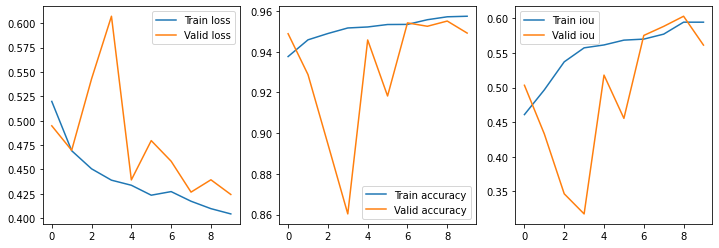

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history_CNN.epoch, history_CNN.history["loss"], label="Train loss")
plt.plot(history_CNN.epoch, history_CNN.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history_CNN.epoch, history_CNN.history["accuracy"], label="Train accuracy")
plt.plot(history_CNN.epoch, history_CNN.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history_CNN.epoch, history_CNN.history["mean_iou"], label="Train iou")
plt.plot(history_CNN.epoch, history_CNN.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

A visualization of the Epochs run is given in the graphs above. It can be clearly seen that the loss has minimized considerably.

A validation accuracy of over 95% was achieved and the IoU was greater than 0.5

# Section 5- Model evaluation and result

It is now necessary to evaluate the performace of the model on the test dataset. The following steps have been perfomed in this section,

1. The model is fit on the test dataset and the bounding box predictions (masks) as well as the classification is generated.

2. Classification accuracy with precision and recall is evaluated

3. A sample image with the predicted bounding box is displayed

4. The AUROC curve is plottted.

The model is fit on the test dataset and the bounding box with a threshold of 0.5 has classified.

In [ ]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
i = 0
test_labels = []
y_pred = []


#only for testing purp
test_gen = generator(folder, test_filenames, None, batch_size=16, image_size=256, shuffle=False, predict=True)
# create submission dictionary
submission_dict = {}
pneumonia_coordinates = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model_CNN.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        conf = 0
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
            location = [x,y,width,height]
            # location = [int(float(i)) for i in predictionString]
            # save pneumonia location in dictionary
            if filename in pneumonia_coordinates:
              pneumonia_coordinates[filename].append(location)
            else:
              pneumonia_coordinates[filename] = [location]

             
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
        
        
        
        #Code to predict the accuracy
        if filename in pneumonia_locations:
          label = 1
        else:
          label = 0
        #print("conf:",conf,"label:",label)
        print('label',label , ' filename :',filename, " conf:",conf)
        if (conf >= 0.2 and label == 1):
          true_positive +=1
          if(true_positive ==1):
            print('label',label , ' filename :',filename, " conf:",conf)
        if (conf < 0.2 and label == 0):
          true_negative +=1
        if (conf >= 0.2 and label == 0):
          false_positive += 1  
        if (conf < 0.2 and label == 1):
          false_negative += 1
        test_labels.append(label)
        if conf > 0:
          y_pred.append(1) 
        else:
          y_pred.append(0) 
        i = i+1
    # stop if we've got them all
    #print(' : ', pneumonia_coordinates)
    if len(submission_dict) >= len(test_filenames):
        break
      
print("Done predicting...")
        
# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('ADAM_LR_SIG.csv')

label 0  filename : 7351c984-3f01-438f-bc30-85b3a74401bb  conf: 0
label 0  filename : 736cb706-9569-4164-a3a0-baafbef1b3c8  conf: 0
label 0  filename : 737c0768-cbf9-44d3-a6e0-01e8244e55d1  conf: 0
label 1  filename : 737007e0-adbe-4773-8e57-da8a0c7b3f53  conf: 0
label 1  filename : 737030d6-07d1-43de-9e11-82b31accd240  conf: 0.6566789
label 1  filename : 737030d6-07d1-43de-9e11-82b31accd240  conf: 0.6566789
label 1  filename : 737aa32f-2044-45a6-b50c-b3aadb51394a  conf: 0.70814514
label 0  filename : 73872731-6970-4490-a23c-afe09c751429  conf: 0
label 0  filename : 73827f0b-0bc9-47eb-8249-14621ad77f5a  conf: 0.59135103
label 1  filename : 738524e2-9e98-43cb-8c56-b480a2a0ae2f  conf: 0.5794704
label 0  filename : 73a53464-7183-4a5e-ba1d-f2c014d1511a  conf: 0
label 0  filename : 739597a4-836a-4591-8ef2-f912a5822a44  conf: 0
label 0  filename : 7391faa9-e52c-4a10-bcd7-56d286c9aee2  conf: 0
label 1  filename : 73a0777c-caaf-405f-80ab-342715b384c9  conf: 0.79049885
label 0  filename : 739b6

In [ ]:
print ('True Positive : ', true_positive)
print ('True Negative : ', true_negative)
print ('False Positive : ', false_positive)
print ('False Negative : ', false_negative)

True Positive :  140
True Negative :  259
False Positive :  67
False Negative :  34


The above code reveals the confusion matrix. It is seen that the predictions have good accuracy. 


In [ ]:
precision = true_positive / ( true_positive + false_positive)
recall = true_positive / (true_positive + false_negative )
accuracy = ( true_positive + true_negative)/ (true_positive + true_negative + false_positive + false_negative)

In [ ]:
print ('precision :' , precision)
print ('recall :', recall)
print ('accuracy :', accuracy)

precision : 0.7990867579908676
recall : 0.6782945736434108
accuracy : 0.746


Overall accuracy of the model is at 74.6%. A host hyperparameter combinations has been tried while the model yield higher precision and recall for this combination only.

The model predicts pneumonia with a 0.799 precision making it reliable than a radiologist with 0.67. (Validated by other researchers)

However, the misclassifcation metric of recall is less than 70%.




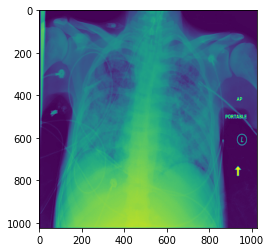

In [ ]:
#metadata = pydicom.read_file(images_path+'/'+'737030d6-07d1-43de-9e11-82b31accd240.dcm')
metadata = pydicom.read_file(images_path+'/'+'7507bb99-a8cf-48c8-a4dd-859ad26e9e1a.dcm')
sample_image = metadata.pixel_array
sample_image.shape
plt.imshow(sample_image)

In [ ]:
bbox = pneumonia_coordinates['7507bb99-a8cf-48c8-a4dd-859ad26e9e1a.dcm']

In [ ]:
sample_image = resize(sample_image, (256, 256), mode='reflect')
#msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
# add trailing channel dimension
#sample_image = np.expand_dims(sample_image, -1)


sample_image.shape

(256, 256)

In [ ]:
test_data = []
test_data.append(sample_image)

In [ ]:
test_data = np.array(test_data)
test_data[0].shape

(256, 256)

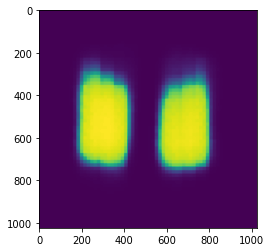

In [ ]:
y_predict = model_CNN.predict(test_data)

mask_predict = np.squeeze(y_predict[0])
msk_resize = resize(mask_predict, (1024, 1024))
plt.imshow(msk_resize)

In [ ]:
%matplotlib inline
import d2l as d2l
from mxnet import image, npx

npx.set_np()

In [ ]:
d2l.set_figsize((3.5, 2.5))
# img = image.imread('../img/catdog.jpg').asnumpy()

In [ ]:
#bbox = pneumonia_coordinates['1be56c93-6607-4b08-b73a-dfe4ca81f7b1.dcm']
bbox2 = pneumonia_locations['7507bb99-a8cf-48c8-a4dd-859ad26e9e1a']

In [ ]:

print('bbox 1 length : ' ,len(bbox),' bbox2 length : ', len(bbox2))


bbox 1 length :  2  bbox2 length :  2


In [ ]:
def bbox_to_rect(bbox, color):
    """Convert bounding box to matplotlib format."""
    # Convert the bounding box (top-left x, top-left y, bottom-right x,
    # bottom-right y) format to matplotlib format: ((upper-left x,
    # upper-left y), width, height)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2], height=bbox[3],
        fill=False, edgecolor=color, linewidth=2)

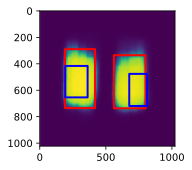

In [ ]:
fig = d2l.plt.imshow(msk_resize)

for i in range(len(bbox)):
 fig.axes.add_patch(bbox_to_rect(bbox[i], 'red'))
for k in range(len(bbox2)):
 fig.axes.add_patch(bbox_to_rect(bbox2[k], 'blue'))

d2l.plt.imshow(msk_resize);

In [ ]:
# Calculating thresolds usings Precision_recall_curve
from sklearn import metrics
#precisions, recalls, thresholds = precision_recall_curve(train_labels_df, pred)
scores = np.array([true_positive, true_negative, false_positive, false_negative])
fpr, tpr, thresholds = metrics.roc_curve(test_labels, y_pred)
print(fpr, tpr)

[0.         0.20552147 1.        ] [0.        0.8045977 1.       ]


In [ ]:
roc_auc = metrics.auc(fpr, tpr)
plt.figure()

<Figure size 252x180 with 0 Axes>

<Figure size 252x180 with 0 Axes>

In [ ]:
import sklearn
import itertools
import cv2
import scipy
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

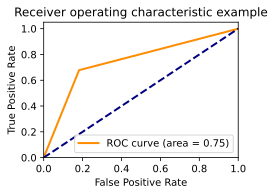

In [ ]:
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
  
#print("Accuracy: %.02f" % sklearn.metrics.accuracy_score(test_labels, np.argmax(y_pred, axis=1)))
  